In [ ]:
!pip install tensorflow==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorf

Installing kaggle on to the envt to pull the data directly instead of downloading it.

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anandita19541","key":"a724aafc630d6dd9fec45d699e973e1d"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# copy kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permissions for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces #downloading the dataset on to the envt

100% 3.74G/3.75G [02:07<00:00, 41.2MB/s]
100% 3.75G/3.75G [02:07<00:00, 31.6MB/s]


In [ ]:
! unzip 140k-real-and-fake-faces.zip #unzipping

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34905.jpg  
  inflating: real_v

Model Building

In [ ]:
import cv2
import numpy as np
from keras import layers
from keras.applications import DenseNet121 #pretrained model
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential # in neural networks we have 2 types of model:Sequential- where we specify the how the layers are connected. in parallel the same is unspecified
from keras.optimizers import Adam# optimizers updte modle in response to o/p of the loss function and assist in minimizing the loss function. ADAM - adaptive moment estimation.
''' Learning rate doesnt have to be constant in ADAM
  computationally efficeint, little memory requirements well suited for problems with large datasets.
'''
import matplotlib.pyplot as plt


from sklearn import metrics
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.10.0


In [ ]:
 # Create a sequential model with a pretrained model as the first layer
def build_model(pretrained):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid'),
        Dropout(0.2)

    ])
    # Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metrics
    model.compile(
        loss='binary_crossentropy',#loss function is essentailly an error function, quantifies the error between o/p of the algo and the target value.

        optimizer=Adam(),#  default hyperparameters-> learning_rate=0.001, beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0
        metrics=['accuracy']
    )

    return model


In [ ]:
 #Set the base path for the image directory and initialize an image generator
base_path = '/content/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)#preprocessing by rescaling.
# Set up the image generator to flow from the training directory with a batch size of 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)


Found 100000 images belonging to 2 classes.


In [ ]:

image_gen1 = ImageDataGenerator(rescale=1./255.)

valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


In [ ]:
# Create a DenseNet121 model without weights and freeze the top layer
densenet = DenseNet121(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(densenet)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
# Calculate the number of steps per epoch for training and validation data
train_steps = 100000//64 #=1562
valid_steps = 20000//64
# Train the model using the fit_generator function with the train_flow and validation_flow generators
history = model.fit_generator(
    train_flow,
    epochs = 10,# iterations
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)


<ipython-input-14-23c8fd46d31e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/11
1562/1562 [==============================] - 1220s 763ms/step - loss: 0.5885 - accuracy: 0.6801 - val_loss: 0.5425 - val_accuracy: 0.7572
Epoch 2/11
1562/1562 [==============================] - 1134s 726ms/step - loss: 0.3748 - accuracy: 0.8329 - val_loss: 0.7219 - val_accuracy: 0.7327
Epoch 3/11
1562/1562 [==============================] - 1132s 725ms/step - loss: 0.2423 - accuracy: 0.8999 - val_loss: 0.3391 - val_accuracy: 0.8678
Epoch 4/11
1562/1562 [==============================] - 1132s 725ms/step - loss: 0.1590 - accuracy: 0.9371 - val_loss: 0.1976 - val_accuracy: 0.9205
Epoch 5/11
1562/1562 [==============================] - 1129s 723ms/step - loss: 0.1076 - accuracy: 0.9584 - val_loss: 0.1561 - val_accuracy: 0.9409
Epoch 6/11
1562/1562 [==============================] - 1129s 723ms/step - loss: 0.0787 - accuracy: 0.9695 - val_loss: 0.1449 - val_accuracy: 0.9474
Epoch 7/11
1562/1562 [==============================] - 1131s 724ms/step - loss: 0.0609 - accuracy: 0.9773

In [ ]:
model.save('densenet.h5')

In [ ]:
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)
y_pred = model.predict(test_flow)
y_test = test_flow.classes

Found 20000 images belonging to 2 classes.
20000/20000 [==============================] - 510s 25ms/step


#Classification Report

In [ ]:
report= metrics.classification_report(y_test, y_pred > 0.5)
print(report)
with open('densenet.txt', 'w') as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10000
           1       0.98      0.94      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



RMSE Score

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.17219231665431323


Training and Validation Loss

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    plt.savefig('Training_validation_Loss_DenseNet.jpg')

Training and Validation Accuracy

In [ ]:
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    plt.savefig('Training_validation_Accuracy_DenseNet.jpg')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

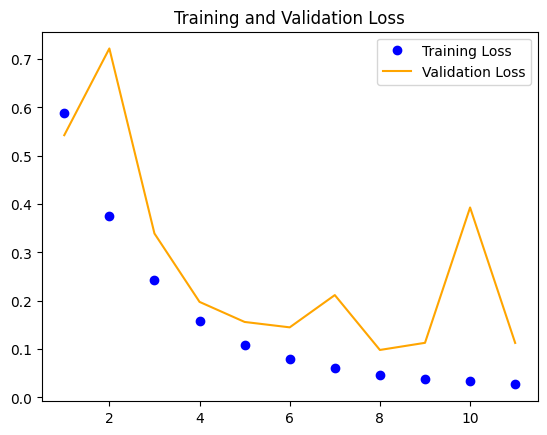

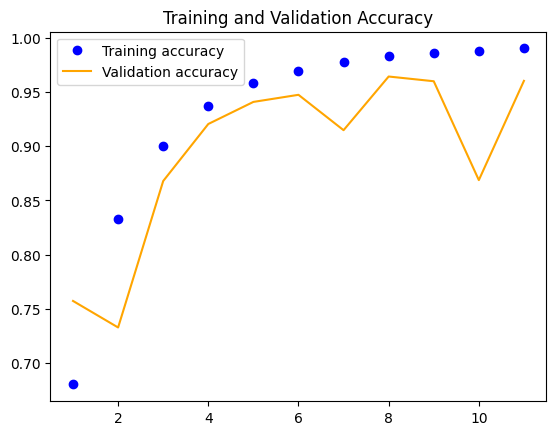

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

ROC AUC Score and AP Score

In [ ]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))


ROC AUC Score: 0.9949229349999998
AP Score: 0.9946398585889417


COnfusion Matrix

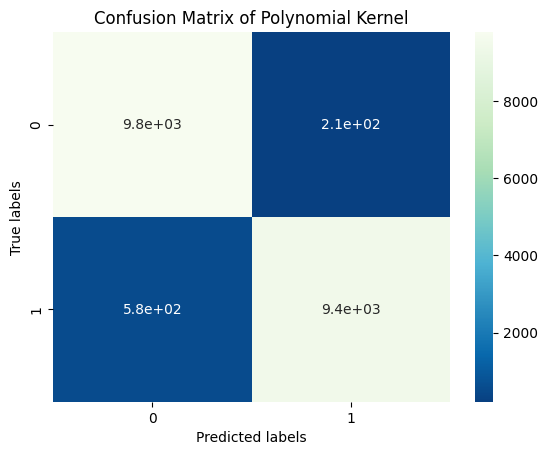

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_p=confusion_matrix(y_test, y_pred > 0.5)
sns.heatmap(cm_p,cmap="GnBu_r",annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of DenseNet')
plt.savefig('DenseNet.jpg')


In [ ]:
y_pred

array([[1.6169347e-03],
       [1.7446665e-07],
       [2.3059743e-02],
       ...,
       [9.9999869e-01],
       [9.9999130e-01],
       [9.9999857e-01]], dtype=float32)

In [ ]:
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred > 0.5 )
print('Accuracy:', accuracy)

Accuracy: 0.96085


PRECISION

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred > 0.5)
print('Precision:', precision)

Precision: 0.9784075573549258


RECALL

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred > 0.5)
print('Recall:', recall)

Recall: 0.9425


F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred > 0.5)
print('F1 Score:', f1_score)

F1 Score: 0.9601181683899557
